In [177]:
import pandas as pd
import numpy as np
np.random.seed(2)

import collections

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.metrics import confusion_matrix

from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image

import os
from PIL import Image

**Import labels and images to arrays**

In [178]:
labels = pd.read_csv('./SMILE_Dataset/annotations.csv', header=None, names=['fname','label'])
# Shuffle data
labels = labels.sample(frac=1).reset_index()

x = np.array([image.img_to_array(image.load_img('./SMILE_Dataset/all/'+fname, target_size=(128, 128))) for fname in labels['fname']])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels['label'])
y = integer_encoded

**Create train and validation set**

In [180]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state = 10)

In [206]:
y_pred = model.predict(X_train)


In [219]:
from sklearn.svm import SVC



In [217]:
pd.DataFrame({'algo1':y_pred,
              'algo2':y_pred})

,algo1,algo2
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
355,1.0,1.0
356,1.0,1.0
357,1.0,1.0
358,1.0,1.0


In [246]:
y_pred = model.predict(X_train)
#y_pred = [np.round(p[0]) for p in y_pred]
y_pred2_test = y_pred2_test.astype(int)

In [252]:
#y_pred = [np.round(p[0]) for p in y
temp_train = pd.DataFrame({'algo1':y_pred_test,
              'algo2':y_pred2_test,
                          'algo3':y_pred_test})

In [253]:
temp_train['new'] = temp_train.mode(axis=1)[0]

In [254]:
temp_train

,algo1,algo2,algo3,new
0,1.0,0,1.0,1.0
1,1.0,0,1.0,1.0
2,1.0,0,1.0,1.0
3,1.0,0,1.0,1.0
4,1.0,0,1.0,1.0
5,1.0,0,1.0,1.0
6,1.0,0,1.0,1.0
7,1.0,0,1.0,1.0
8,1.0,0,1.0,1.0
9,1.0,0,1.0,1.0


In [195]:
# My models are having time using this split of data. Therefore, part of my error analysis will be investigating why!
# And not use kfold because it takes too long

X_train = np.concatenate((x[0:120], x[160::]), axis = 0)
y_train = np.concatenate((y[0:120], y[160::]), axis = 0)

X_test = x[120:160]
y_test = y[120:160]

In [257]:
model = build_model1()
model2 = build_model()
model3 = build_model2()

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1, 
                             shear_range=0.1,
                             zoom_range=0.1)   

datagen.fit(X_train)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                        patience=3, 
                                        verbose=1, 
                                        factor=0.5, 
                                        min_lr=0.00001)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), epochs = 10, 
                          validation_data = (X_test,y_test), steps_per_epoch=len(X_train) / 32,
                          callbacks=[learning_rate_reduction])

history2 = model2.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), epochs = 10, 
                          validation_data = (X_test,y_test), steps_per_epoch=len(X_train) / 32,
                          callbacks=[learning_rate_reduction])

history3 = model3.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), epochs = 10, 
                          validation_data = (X_test,y_test), steps_per_epoch=len(X_train) / 32,
                          callbacks=[learning_rate_reduction])

# # Retrieve training predictions to train stacking aglortihm, in this case majority vote
# y_pred = model.predict(X_train)
# y_pred = y_pred.astype(int) # Convert float to int

# y_pred2 = model2.predict(X_train)
# y_pred2 = y_pred2.astype(int) # Convert float to int

# y_pred3 = model3.predict(X_train)
# y_pred3 = y_pred3.astype(int) # Convert float to int

# # Reshape the data (360, 1) -> (360)

# y_pred = y_pred.reshape(360)
# y_pred2 = y_pred2.reshape(360)
# y_pred3 = y_pred3.reshape(360)


# temp_train = pd.DataFrame({'algo1':y_pred,
#                            'algo2':y_pred2,
#                            'algo3':y_pred3})

# # Majority vote using the mode
# temp_train['new'] = temp_train.mode(axis=1)[0]

# clf = SVC(gamma='auto')
# clf.fit(temp_train, y_train)

# now we get test

y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.astype(int) # Convert float to int
y_pred2_test = model2.predict(X_test)
y_pred2_test = y_pred2_test.astype(int) # Convert float to int
y_pred3_test = model3.predict(X_test)
y_pred3_test = y_pred3.astype(int) # Convert float to int

y_pred_test = y_pred_test.reshape(40)
y_pred2_test = y_pred2_test.reshape(40)
y_pred3_test = y_pred3_test.reshape(40)


temp_test = pd.DataFrame({'algo1':y_pred_test,
                           'algo2':y_pred2_test,
                           'algo3':y_pred3_test})

temp_test['prediction'] = temp_test.mode(axis=1)[0]

#preds = clf.predict(temp_train)

Epoch 1/10
12/11 [================================] - 9s 717ms/step - loss: 0.6914 - acc: 0.5000 - val_loss: 25.8741 - val_acc: 0.5000
Epoch 2/10
12/11 [================================] - 6s 518ms/step - loss: 0.6735 - acc: 0.5792 - val_loss: 49.8936 - val_acc: 0.5000
Epoch 3/10
12/11 [================================] - 6s 502ms/step - loss: 0.6583 - acc: 0.6750 - val_loss: 35.7561 - val_acc: 0.6000
Epoch 4/10
12/11 [================================] - 7s 542ms/step - loss: 0.5701 - acc: 0.7042 - val_loss: 3.1082 - val_acc: 0.9250
Epoch 5/10
12/11 [================================] - 6s 518ms/step - loss: 0.4760 - acc: 0.7833 - val_loss: 94.2393 - val_acc: 0.6500
Epoch 6/10
12/11 [================================] - 6s 504ms/step - loss: 0.3984 - acc: 0.8417 - val_loss: 2.2915 - val_acc: 0.9500
Epoch 7/10
12/11 [================================] - 6s 541ms/step - loss: 0.3272 - acc: 0.8750 - val_loss: 52.5875 - val_acc: 0.8500
Epoch 8/10
12/11 [================================] - 6s 

NameError: name 'y_pred3_test' is not defined

In [259]:

y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.astype(int) # Convert float to int
y_pred2_test = model2.predict(X_test)
y_pred2_test = y_pred2_test.astype(int) # Convert float to int
y_pred3_test = model3.predict(X_test)
y_pred3_test = y_pred3_test.astype(int) # Convert float to int

y_pred_test = y_pred_test.reshape(40)
y_pred2_test = y_pred2_test.reshape(40)
y_pred3_test = y_pred3_test.reshape(40)


temp_test = pd.DataFrame({'algo1':y_pred_test,
                           'algo2':y_pred2_test,
                           'algo3':y_pred3_test})

temp_test['prediction'] = temp_test.mode(axis=1)[0]


In [260]:
print(classification_report(y_test, temp_test['prediction']))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



In [263]:
print(classification_report(y_test, y_pred3_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.83      1.00      0.91        20

    accuracy                           0.90        40
   macro avg       0.92      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



In [221]:
y_pred_test = y_pred_test.reshape(40)
y_pred2_test = y_pred2_test.reshape(40)

temp_train = pd.DataFrame({'algo1':y_pred_test,
              'algo2':y_pred2_test})

preds = clf.predict(temp_train)

In [225]:
y_pred2_test

array([0.0000000e+00, 0.0000000e+00, 5.2452087e-06, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 9.4473362e-05, 3.7446320e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5380979e-04,
       1.4901161e-06, 5.6624413e-07, 0.0000000e+00, 6.3776970e-06,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4603138e-05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4901161e-06,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.4901161e-07, 6.8545341e-07, 6.4432621e-05],
      dtype=float32)

In [222]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [199]:
import keras

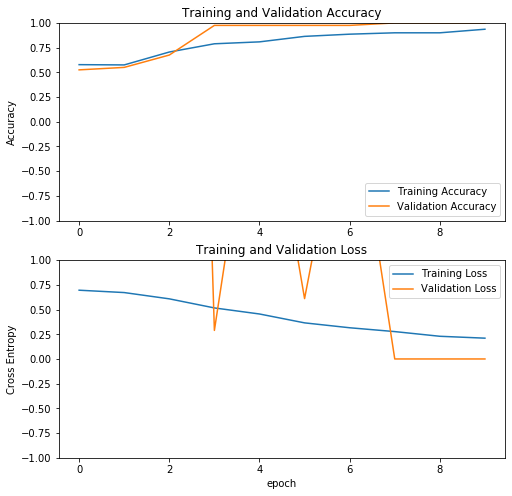

In [189]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [151]:
acc

[0.50555557,
 0.69166666,
 0.725,
 0.73055553,
 0.8138889,
 0.88611114,
 0.90555555,
 0.9,
 0.91944444,
 0.8972222]

# Models

In [170]:
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
def build_model4():
    dropout_dense_layer = 0.1

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_dense_layer))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_dense_layer))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])
    return model

In [164]:
import keras
t = build_model4()

In [165]:
t.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 58, 58, 32)      

In [ ]:
def build_model3():
    
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5,5),padding = 'Same', activation ='relu', input_shape=(64, 64, 3)))
    model.add(layers.Conv2D(32, (5,5),padding = 'Same', activation ='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))


    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['acc'])
    return model

In [179]:
def build_model2():
    
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5,5),padding = 'Same', activation ='relu', input_shape=(128, 128, 3)))
    model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['acc'])
    return model

In [201]:
def build_model1():

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Feed to a densily connected layer for prediction
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(.2))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0002, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['acc'])
    
    return model

In [175]:
def build_model():

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Feed to a densily connected layer for prediction
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['acc'])
    
    return model

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
datagen = ImageDataGenerator(rescale=1./255)
datagen.fit(X_train)

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 50, 
                              validation_data = (X_val,y_val), steps_per_epoch=len(X_train) / 32,
                              callbacks=[learning_rate_reduction])

Epoch 1/20
12/11 [================================] - 2s 161ms/step - loss: 0.0776 - acc: 0.9694 - val_loss: 9.2421 - val_acc: 0.9500
Epoch 2/20
12/11 [================================] - 2s 156ms/step - loss: 0.0808 - acc: 0.9722 - val_loss: 9.1715 - val_acc: 0.9500
Epoch 3/20
12/11 [================================] - 2s 154ms/step - loss: 0.0772 - acc: 0.9750 - val_loss: 9.1436 - val_acc: 0.9500
Epoch 4/20
12/11 [================================] - 2s 159ms/step - loss: 0.0770 - acc: 0.9778 - val_loss: 9.0988 - val_acc: 0.9500
Epoch 5/20
12/11 [================================] - 2s 162ms/step - loss: 0.0764 - acc: 0.9750 - val_loss: 9.0718 - val_acc: 0.9500
Epoch 6/20
12/11 [================================] - 2s 163ms/step - loss: 0.1075 - acc: 0.9722 - val_loss: 8.9662 - val_acc: 0.9500
Epoch 7/20
12/11 [================================] - 2s 162ms/step - loss: 0.0776 - acc: 0.9722 - val_loss: 8.8984 - val_acc: 0.9500
Epoch 8/20
12/11 [================================] - 2s 154ms

In [30]:
y_pred = model.predict(X_val)

In [31]:
y_val

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [33]:
from sklearn.metrics import classification_report
?classification_report

In [35]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



# K FOLD!

In [203]:
reports = []

kf = StratifiedKFold(n_splits=10)

# shuffle data
id = 1
for train_index, test_index in kf.split(x,y):
    print('Kfold iteration {}/10'.format(id))
    id += 1
    print('Total images: {} ---- Train images: {} ---- Test images: {}'.format(len(x),len(train_index),len(test_index)))
    #print("Train index start:{} and finish index: {}".format(train_index[0],train_index[-1]))
    print("Test index start:{} and finish index: {}".format(test_index[0],test_index[-1]))
    
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('Distribution of labels: {}'.format(collections.Counter(y_test)))
    
    model = build_model1()

    datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
                                 width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
                                 height_shift_range=0.1, 
                                 shear_range=0.1,
                                 zoom_range=0.1)   
    
    datagen.fit(X_train)

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
    
    history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), epochs = 20, 
                              validation_data = (X_test,y_test), steps_per_epoch=len(X_train) / 32,
                              callbacks=[learning_rate_reduction])
    
    y_pred = model.predict(X_test)
    y_pred = [np.round(p[0]) for p in y_pred]
    
    print(classification_report(y_test, y_pred))
    reports.append(classification_report(y_test, y_pred,output_dict=True))

Kfold iteration 1/10
Total images: 400 ---- Train images: 360 ---- Test images: 40
Test index start:0 and finish index: 41
Distribution of labels: Counter({1: 20, 0: 20})
Epoch 1/20
12/11 [================================] - 8s 683ms/step - loss: 0.6930 - acc: 0.5000 - val_loss: 28.3470 - val_acc: 0.5000
Epoch 2/20
12/11 [================================] - 6s 529ms/step - loss: 0.6612 - acc: 0.6083 - val_loss: 3.0695 - val_acc: 0.8750
Epoch 3/20
12/11 [================================] - 6s 505ms/step - loss: 0.6150 - acc: 0.6875 - val_loss: 32.1166 - val_acc: 0.7250
Epoch 4/20
12/11 [================================] - 6s 530ms/step - loss: 0.5055 - acc: 0.7833 - val_loss: 21.2925 - val_acc: 0.8750
Epoch 5/20
12/11 [================================] - 6s 540ms/step - loss: 0.4121 - acc: 0.8708 - val_loss: 13.8512 - val_acc: 0.9000
Epoch 6/20
12/11 [================================] - 6s 504ms/step - loss: 0.3619 - acc: 0.8542 - val_loss: 11.0450 - val_acc: 0.9250
Epoch 7/20
12/11 [==

12/11 [================================] - 6s 515ms/step - loss: 0.2792 - acc: 0.9167 - val_loss: 47.9421 - val_acc: 0.8500
Epoch 9/20
12/11 [================================] - 6s 500ms/step - loss: 0.2159 - acc: 0.9083 - val_loss: 40.2088 - val_acc: 0.9000
Epoch 10/20
12/11 [================================] - 6s 539ms/step - loss: 0.2172 - acc: 0.9208 - val_loss: 48.3475 - val_acc: 0.9000

Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 11/20
12/11 [================================] - 6s 535ms/step - loss: 0.1921 - acc: 0.9167 - val_loss: 46.6037 - val_acc: 0.9000
Epoch 12/20
12/11 [================================] - 6s 514ms/step - loss: 0.1666 - acc: 0.9375 - val_loss: 50.1123 - val_acc: 0.9000
Epoch 13/20
12/11 [================================] - 7s 547ms/step - loss: 0.1830 - acc: 0.9292 - val_loss: 52.1014 - val_acc: 0.9000

Epoch 00013: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 14/20
12/11 [================

12/11 [================================] - 7s 547ms/step - loss: 0.1741 - acc: 0.9333 - val_loss: 3.0277 - val_acc: 0.9750

Epoch 00014: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 15/20
12/11 [================================] - 6s 499ms/step - loss: 0.1586 - acc: 0.9417 - val_loss: 8.7632 - val_acc: 0.9750
Epoch 16/20
12/11 [================================] - 6s 525ms/step - loss: 0.1747 - acc: 0.9333 - val_loss: 9.1228 - val_acc: 0.9750
Epoch 17/20
12/11 [================================] - 6s 504ms/step - loss: 0.1765 - acc: 0.9208 - val_loss: 2.4700 - val_acc: 0.9750

Epoch 00017: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
Epoch 18/20
12/11 [================================] - 6s 499ms/step - loss: 0.1655 - acc: 0.9333 - val_loss: 5.3459 - val_acc: 0.9750
Epoch 19/20
12/11 [================================] - 6s 531ms/step - loss: 0.1598 - acc: 0.9500 - val_loss: 5.2645 - val_acc: 0.9750
Epoch 20/20
12/11 [=====================


Epoch 00020: ReduceLROnPlateau reducing learning rate to 1e-05.
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Kfold iteration 8/10
Total images: 400 ---- Train images: 360 ---- Test images: 40
Test index start:280 and finish index: 323
Distribution of labels: Counter({0: 20, 1: 20})
Epoch 1/20
12/11 [================================] - 13s 1s/step - loss: 0.6940 - acc: 0.4875 - val_loss: 8.8172 - val_acc: 0.5000
Epoch 2/20
12/11 [================================] - 9s 731ms/step - loss: 0.6605 - acc: 0.6500 - val_loss: 24.0278 - val_acc: 0.5250
Epoch 3/20
12/11 [================================] - 9s 717ms/step - loss: 0.6335 - acc: 0.7042 - val_loss: 22.0322 - val_acc: 0.5750
Epoch 4/20
12/11 [==============

Epoch 6/20
12/11 [================================] - 11s 908ms/step - loss: 0.3401 - acc: 0.8875 - val_loss: 43.5970 - val_acc: 0.8750
Epoch 7/20
12/11 [================================] - 10s 819ms/step - loss: 0.3552 - acc: 0.8417 - val_loss: 14.3053 - val_acc: 0.9000
Epoch 8/20
12/11 [================================] - 9s 760ms/step - loss: 0.2544 - acc: 0.8875 - val_loss: 50.3714 - val_acc: 0.8750

Epoch 00008: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
Epoch 9/20
12/11 [================================] - 8s 692ms/step - loss: 0.2384 - acc: 0.9167 - val_loss: 41.9693 - val_acc: 0.8500
Epoch 10/20
12/11 [================================] - 9s 791ms/step - loss: 0.2065 - acc: 0.9125 - val_loss: 57.6821 - val_acc: 0.8750
Epoch 11/20
12/11 [================================] - 9s 778ms/step - loss: 0.1795 - acc: 0.9167 - val_loss: 27.6161 - val_acc: 0.9000

Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 12/20
12/11 [=====

In [204]:
f1s4 = []
for rep in reports:
    f1s4.append(rep['0']['f1-score'])
    f1s4.append(rep['1']['f1-score'])

In [265]:
reports[0]['weighted avg']['f1-score']

0.949874686716792

In [205]:
np.mean(f1s4)

0.9473728632893634

In [100]:
np.mean(f1s)

0.9410731116866572

In [116]:
np.mean(f1s2)

0.9361187755781935

In [131]:
np.mean(f1s3)

0.9599498981976516

In [101]:
f1s

[0.9545454545454545,
 0.9444444444444444,
 0.9523809523809523,
 0.9473684210526315,
 0.9032258064516129,
 0.9387755102040817,
 0.8292682926829269,
 0.8205128205128205,
 0.9444444444444444,
 0.9545454545454546,
 0.9583333333333334,
 0.9375,
 0.896551724137931,
 0.9411764705882353,
 0.975609756097561,
 0.9743589743589743,
 1.0,
 1.0,
 0.9787234042553191,
 0.9696969696969697]

In [117]:
f1s2

[0.9777777777777777,
 0.9714285714285714,
 0.9,
 0.9,
 0.9032258064516129,
 0.9387755102040817,
 0.8205128205128205,
 0.8292682926829269,
 0.972972972972973,
 0.9767441860465117,
 0.9795918367346939,
 0.967741935483871,
 0.8387096774193549,
 0.8979591836734694,
 0.975609756097561,
 0.9743589743589743,
 1.0,
 1.0,
 0.9565217391304348,
 0.9411764705882353]

In [133]:
f1s3

[1.0,
 1.0,
 1.0,
 1.0,
 0.8947368421052632,
 0.9047619047619048,
 0.8717948717948718,
 0.8780487804878048,
 0.975609756097561,
 0.9743589743589743,
 1.0,
 1.0,
 0.9743589743589743,
 0.975609756097561,
 0.975609756097561,
 0.9743589743589743,
 0.9523809523809523,
 0.9473684210526316,
 0.9500000000000001,
 0.9500000000000001]